In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

dataset = pd.read_csv("ds_salaries.csv")
dataset.shape

(3755, 11)

In [3]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Análise Exploratória

work_year
2020      76
2021     230
2022    1664
2023    1785
dtype: int64


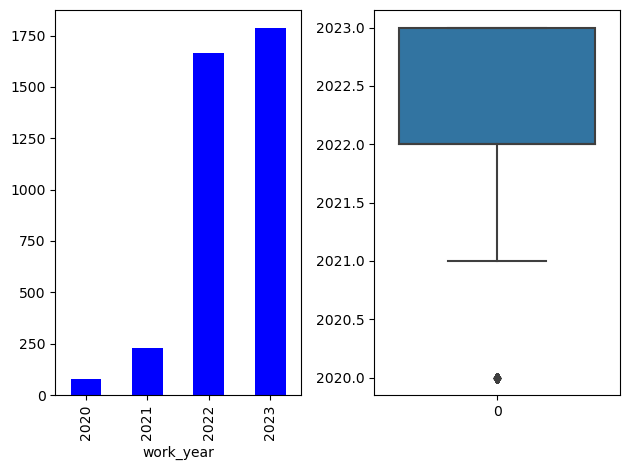

In [4]:
#analisando coluna 'work_year'
agrupado = dataset.groupby(['work_year']).size()
print(agrupado)

plt.figure(1) #criando objeto 1
plt.subplot(1, 2, 1)
agrupado.plot.bar(color = 'blue')
plt.subplot(1, 2, 2)
sb.boxplot(dataset['work_year'])
plt.tight_layout()

experience_level
EN     320
EX     114
MI     805
SE    2516
dtype: int64


<Axes: xlabel='experience_level', ylabel='Density'>

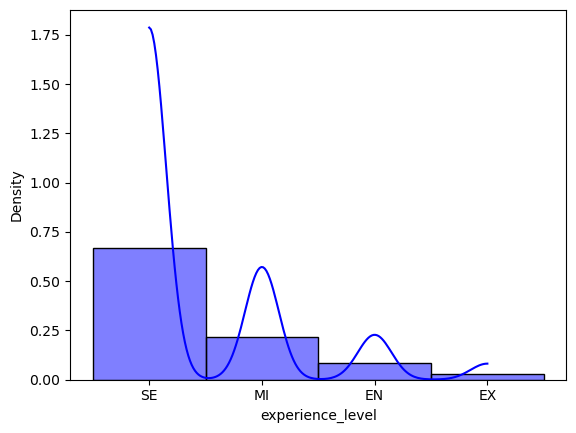

In [5]:
#analisando coluna 'experience_level'
agrupado = dataset.groupby(['experience_level']).size()
print(agrupado)
sb.histplot(dataset.experience_level, color = 'blue', kde = True, stat = "density")

employment_type
CT      10
FL      10
FT    3718
PT      17
dtype: int64


<Axes: xlabel='employment_type'>

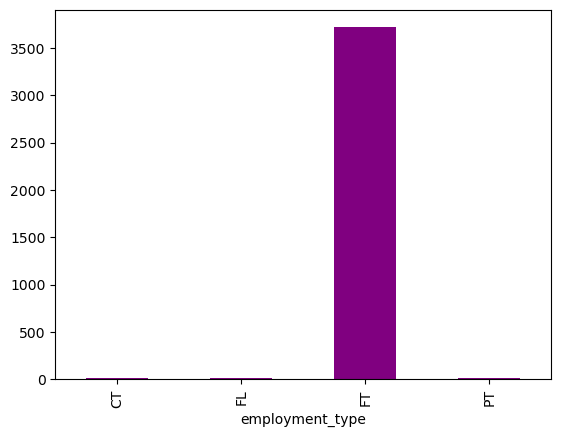

In [6]:
#coluna 'employment_type'
agrupado = dataset.groupby(['employment_type']).size()
print(agrupado)
agrupado.plot.bar(color = 'purple')

In [7]:
#coluna 'job_title'
agrupado = dataset.groupby(['job_title']).size()
print(agrupado)
dataset['job_title'].describe()

job_title
3D Computer Vision Researcher      4
AI Developer                      11
AI Programmer                      2
AI Scientist                      16
Analytics Engineer               103
                                ... 
Research Engineer                 37
Research Scientist                82
Software Data Engineer             2
Staff Data Analyst                 1
Staff Data Scientist               1
Length: 93, dtype: int64


count              3755
unique               93
top       Data Engineer
freq               1040
Name: job_title, dtype: object

salary
6000        1
7000        1
7500        1
8000        2
8760        1
           ..
7000000     2
7500000     1
8500000     1
11000000    2
30400000    1
Length: 815, dtype: int64


Text(0.5, 1.0, 'Salário')

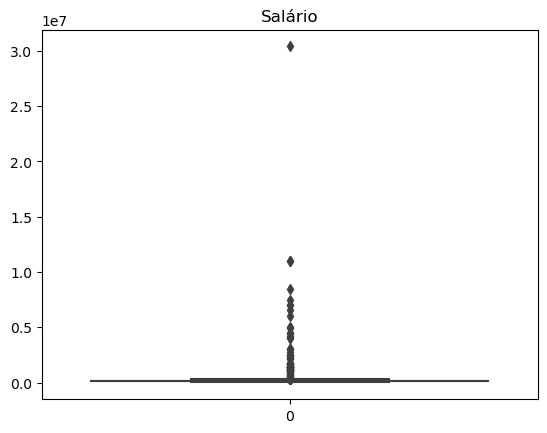

In [8]:
#coluna 'salary'
agrupado = dataset.groupby(['salary']).size()
print(agrupado)
sb.boxplot(dataset['salary']).set_title('Salário')

salary_currency
AUD       9
BRL       6
CAD      25
CHF       4
CLP       1
CZK       1
DKK       3
EUR     236
GBP     161
HKD       1
HUF       3
ILS       1
INR      60
JPY       3
MXN       1
PLN       5
SGD       6
THB       2
TRY       3
USD    3224
dtype: int64


<Axes: xlabel='salary_currency'>

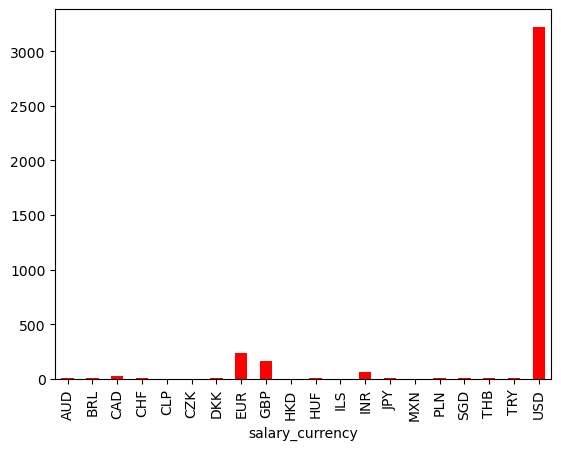

In [41]:
#coluna 'salary_currency'
agrupado = dataset.groupby(['salary_currency']).size()
print(agrupado)
agrupado.plot.bar(color = 'red')

Text(0.5, 1.0, 'salary_in_usd')

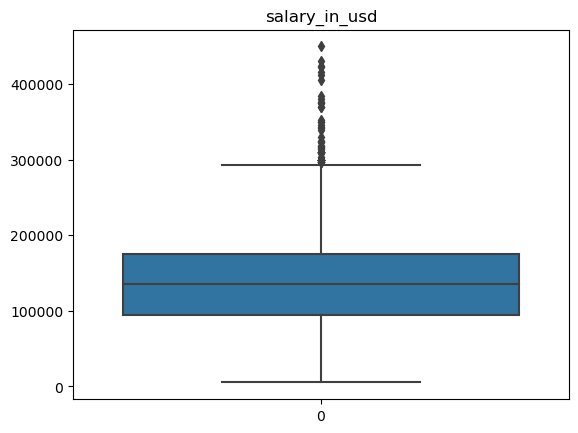

In [10]:
agrupado = dataset.groupby(['salary_in_usd']).size()
sb.boxplot(dataset['salary_in_usd']).set_title('salary_in_usd')

In [11]:
#coluna employee_residence
agrupado = dataset.groupby(['employee_residence']).size()
agrupado

employee_residence
AE       3
AM       1
AR       6
AS       2
AT       6
      ... 
TR       5
UA       4
US    3004
UZ       2
VN       3
Length: 78, dtype: int64

remote_ratio
0      1923
50      189
100    1643
dtype: int64


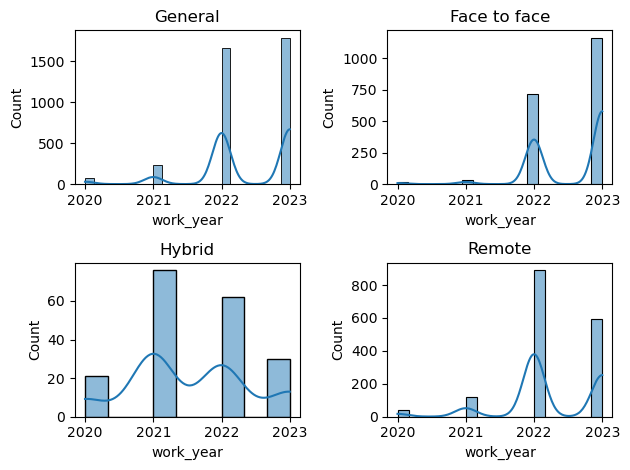

In [34]:
#coluna 'remote_ratio'
agrupado = dataset.groupby(['remote_ratio']).size()
print(agrupado)

#plote o histograma da coluna 'work_year' para valores em 'remote_ratio'
plt.figure(1) #criando objeto 1
plt.subplot(2, 2, 1)
sb.histplot(dataset.work_year, kde = True).set_title('General')
#plote o histograma da coluna 'work_year' para valores em 'remote_ratio' igual a 0
plt.subplot(2, 2, 2)
sb.histplot(dataset.loc[dataset['remote_ratio'] == 0].work_year, kde = True).set_title('Face to face')
#plote o histograma da coluna 'work_year' para valores em 'remote_ratio' igual a 50
plt.subplot(2, 2, 3)
sb.histplot(dataset.loc[dataset['remote_ratio'] == 50].work_year, kde = True).set_title('Hybrid')
#plote o histograma da coluna 'work_year' para valores em 'remote_ratio' igual a 100
plt.subplot(2, 2, 4)
sb.histplot(dataset.loc[dataset['remote_ratio'] == 100].work_year, kde = True).set_title('Remote')
plt.tight_layout()

In [ ]:
agrupado = dataset.groupby(['company_location']).size()
agrupado

company_location
AE       3
AL       1
AM       1
AR       3
AS       3
      ... 
TH       3
TR       5
UA       4
US    3040
VN       1
Length: 72, dtype: int64

company_size
L     454
M    3153
S     148
dtype: int64


<Axes: xlabel='company_size'>

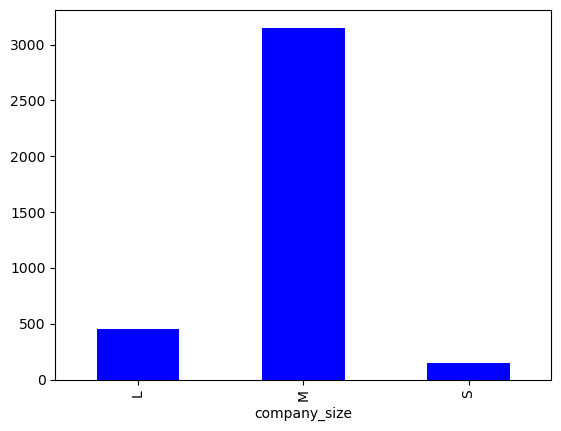

In [ ]:
agrupado = dataset.groupby(['company_size']).size()
print(agrupado)
agrupado.plot.bar(color = 'blue')

In [ ]:
#tratamento de NAs
dataset.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [36]:
#tratamento coluna 'experience_level'
dataset.loc[dataset['experience_level'] == 'SE', 'experience_level'] = 'Senior'
dataset.loc[dataset['experience_level'] == 'MI', 'experience_level'] = 'Mid'
dataset.loc[dataset['experience_level'] == 'EX', 'experience_level'] = 'Intermediate'
dataset.loc[dataset['experience_level'] == 'EN', 'experience_level'] = 'Entry'

print(dataset.groupby(['experience_level']).size())

experience_level
Entry            320
Intermediate     114
Mid              805
Senior          2516
dtype: int64


In [37]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
